# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data-arrays

In [2]:
bd_1975 = np.array([  8.4 ,   8.8 ,   8.4 ,   8.  ,   7.9 ,   8.9 ,   8.6 ,   8.5 ,
         8.9 ,   9.1 ,   8.6 ,   9.8 ,   8.2 ,   9.  ,   9.7 ,   8.6 ,
         8.2 ,   9.  ,   8.4 ,   8.6 ,   8.9 ,   9.1 ,   8.3 ,   8.7 ,
         9.6 ,   8.5 ,   9.1 ,   9.  ,   9.2 ,   9.9 ,   8.6 ,   9.2 ,
         8.4 ,   8.9 ,   8.5 ,  10.4 ,   9.6 ,   9.1 ,   9.3 ,   9.3 ,
         8.8 ,   8.3 ,   8.8 ,   9.1 ,  10.1 ,   8.9 ,   9.2 ,   8.5 ,
        10.2 ,  10.1 ,   9.2 ,   9.7 ,   9.1 ,   8.5 ,   8.2 ,   9.  ,
         9.3 ,   8.  ,   9.1 ,   8.1 ,   8.3 ,   8.7 ,   8.8 ,   8.6 ,
         8.7 ,   8.  ,   8.8 ,   9.  ,   9.1 ,   9.74,   9.1 ,   9.8 ,
        10.4 ,   8.3 ,   9.44,   9.04,   9.  ,   9.05,   9.65,   9.45,
         8.65,   9.45,   9.45,   9.05,   8.75,   9.45,   8.35])

bd_2012 = np.array([  9.4 ,   8.9 ,   9.5 ,  11.  ,   8.7 ,   8.4 ,   9.1 ,   8.7 ,
        10.2 ,   9.6 ,   8.85,   8.8 ,   9.5 ,   9.2 ,   9.  ,   9.8 ,
         9.3 ,   9.  ,  10.2 ,   7.7 ,   9.  ,   9.5 ,   9.4 ,   8.  ,
         8.9 ,   9.4 ,   9.5 ,   8.  ,  10.  ,   8.95,   8.2 ,   8.8 ,
         9.2 ,   9.4 ,   9.5 ,   8.1 ,   9.5 ,   8.4 ,   9.3 ,   9.3 ,
         9.6 ,   9.2 ,  10.  ,   8.9 ,  10.5 ,   8.9 ,   8.6 ,   8.8 ,
         9.15,   9.5 ,   9.1 ,  10.2 ,   8.4 ,  10.  ,  10.2 ,   9.3 ,
        10.8 ,   8.3 ,   7.8 ,   9.8 ,   7.9 ,   8.9 ,   7.7 ,   8.9 ,
         9.4 ,   9.4 ,   8.5 ,   8.5 ,   9.6 ,  10.2 ,   8.8 ,   9.5 ,
         9.3 ,   9.  ,   9.2 ,   8.7 ,   9.  ,   9.1 ,   8.7 ,   9.4 ,
         9.8 ,   8.6 ,  10.6 ,   9.  ,   9.5 ,   8.1 ,   9.3 ,   9.6 ,
         8.5 ,   8.2 ,   8.  ,   9.5 ,   9.7 ,   9.9 ,   9.1 ,   9.5 ,
         9.8 ,   8.4 ,   8.3 ,   9.6 ,   9.4 ,  10.  ,   8.9 ,   9.1 ,
         9.8 ,   9.3 ,   9.9 ,   8.9 ,   8.5 ,  10.6 ,   9.3 ,   8.9 ,
         8.9 ,   9.7 ,   9.8 ,  10.5 ,   8.4 ,  10.  ,   9.  ,   8.7 ,
         8.8 ,   8.4 ,   9.3 ,   9.8 ,   8.9 ,   9.8 ,   9.1 ])

# ECDF Function

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# ECDF Visualization Function

In [4]:
def ecdf_visual(control, treated, xlab):
     # Compute x,y values for ECDFs
     x_control, y_control = ecdf(control)
     x_treated, y_treated = ecdf(treated)

     # Plot the ECDFs
     plt.plot(x_control, y_control, marker='.', linestyle='none')
     plt.plot(x_treated, y_treated, marker='.', linestyle='none')

     # Set the margins
     plt.margins(0.02)

     # Add a legend
     plt.legend(('control', 'treated'), loc='lower right')

     # Label axes and show plot
     plt.xlabel(xlab)
     plt.ylabel('ECDF')
     plt.show()
     
     return plt.show()

# Run ecdf_visual Function

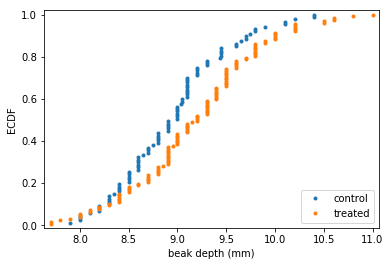

In [5]:
ecdf_visual(bd_1975, bd_2012, 'beak depth (mm)')

# Bootstrap Replicate Function

In [6]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Generating many bootstrap replicates-Function

In [7]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Parameter estimates

In [8]:
def param_est(array1, array2, func, num_reps, conf_int1, conf_int2, units):
    # Compute the difference of the sample means: mean_diff
    mean_diff = np.mean(array1) - np.mean(array2)

    # Get bootstrap replicates of means
    bs_replicates_1 = draw_bs_reps(array1, func, size=num_reps)
    bs_replicates_2 = draw_bs_reps(array2, func, size=num_reps)

    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_replicates_2 - bs_replicates_1

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates, [conf_int1, conf_int2])

    # Print the results
    return print('difference of means =', mean_diff, units), print('95% confidence interval =', conf_int, units)

# Run Parameter estimate Function

In [9]:
param_est(bd_1975, bd_2012, func=np.mean, num_reps=10000, conf_int1=2.5, conf_int2=97.5, units='mm')

difference of means = -0.226220472441 mm
95% confidence interval = [ 0.06138173  0.3870493 ] mm


(None, None)

# Data arrays

In [10]:
bl_1975 = np.array([ 13.9 ,  14.  ,  12.9 ,  13.5 ,  12.9 ,  14.6 ,  13.  ,  14.2 ,
        14.  ,  14.2 ,  13.1 ,  15.1 ,  13.5 ,  14.4 ,  14.9 ,  12.9 ,
        13.  ,  14.9 ,  14.  ,  13.8 ,  13.  ,  14.75,  13.7 ,  13.8 ,
        14.  ,  14.6 ,  15.2 ,  13.5 ,  15.1 ,  15.  ,  12.8 ,  14.9 ,
        15.3 ,  13.4 ,  14.2 ,  15.1 ,  15.1 ,  14.  ,  13.6 ,  14.  ,
        14.  ,  13.9 ,  14.  ,  14.9 ,  15.6 ,  13.8 ,  14.4 ,  12.8 ,
        14.2 ,  13.4 ,  14.  ,  14.8 ,  14.2 ,  13.5 ,  13.4 ,  14.6 ,
        13.5 ,  13.7 ,  13.9 ,  13.1 ,  13.4 ,  13.8 ,  13.6 ,  14.  ,
        13.5 ,  12.8 ,  14.  ,  13.4 ,  14.9 ,  15.54,  14.63,  14.73,
        15.73,  14.83,  15.94,  15.14,  14.23,  14.15,  14.35,  14.95,
        13.95,  14.05,  14.55,  14.05,  14.45,  15.05,  13.25])

bl_2012 = np.array([ 14.3 ,  12.5 ,  13.7 ,  13.8 ,  12.  ,  13.  ,  13.  ,  13.6 ,
        12.8 ,  13.6 ,  12.95,  13.1 ,  13.4 ,  13.9 ,  12.3 ,  14.  ,
        12.5 ,  12.3 ,  13.9 ,  13.1 ,  12.5 ,  13.9 ,  13.7 ,  12.  ,
        14.4 ,  13.5 ,  13.8 ,  13.  ,  14.9 ,  12.5 ,  12.3 ,  12.8 ,
        13.4 ,  13.8 ,  13.5 ,  13.5 ,  13.4 ,  12.3 ,  14.35,  13.2 ,
        13.8 ,  14.6 ,  14.3 ,  13.8 ,  13.6 ,  12.9 ,  13.  ,  13.5 ,
        13.2 ,  13.7 ,  13.1 ,  13.2 ,  12.6 ,  13.  ,  13.9 ,  13.2 ,
        15.  ,  13.37,  11.4 ,  13.8 ,  13.  ,  13.  ,  13.1 ,  12.8 ,
        13.3 ,  13.5 ,  12.4 ,  13.1 ,  14.  ,  13.5 ,  11.8 ,  13.7 ,
        13.2 ,  12.2 ,  13.  ,  13.1 ,  14.7 ,  13.7 ,  13.5 ,  13.3 ,
        14.1 ,  12.5 ,  13.7 ,  14.6 ,  14.1 ,  12.9 ,  13.9 ,  13.4 ,
        13.  ,  12.7 ,  12.1 ,  14.  ,  14.9 ,  13.9 ,  12.9 ,  14.6 ,
        14.  ,  13.  ,  12.7 ,  14.  ,  14.1 ,  14.1 ,  13.  ,  13.5 ,
        13.4 ,  13.9 ,  13.1 ,  12.9 ,  14.  ,  14.  ,  14.1 ,  14.7 ,
        13.4 ,  13.8 ,  13.4 ,  13.8 ,  12.4 ,  14.1 ,  12.9 ,  13.9 ,
        14.3 ,  13.2 ,  14.2 ,  13.  ,  14.6 ,  13.1 ,  15.2 ])

# Graphical EDA

In [11]:
def graph_eda(array1x,array1y, array2x, array2y, marker,linestyle, alpha=.5):
    # Make scatter plot of array1
    _ = plt.plot(array1x, array1y, marker=marker,
             linestyle=linestyle, color='red', alpha=alpha)

    # Make scatter plot of array2
    _ = plt.plot(array1x, array1y, marker=marker,
             linestyle=linestyle, color='blue', alpha=alpha)

    # Label axes and make legend
    _ = plt.xlabel('beak length (mm)')
    _ = plt.ylabel('beak depth (mm)')
    _ = plt.legend(('1975', '2012'), loc='upper left')

    # Show the plot
    return plt.show()

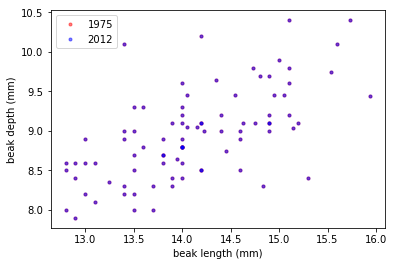

In [12]:
graph_eda(bl_1975, bd_1975, bl_2012, bd_2012, marker='.', linestyle='none')